In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from urllib import request

# trainデータのダウンロード
url = 'http://dv129ryj03col.cloudfront.net/train.pickle'
request.urlretrieve(url, 'train.pickle')

# testデータのダウンロード
url = 'http://dv129ryj03col.cloudfront.net/test.pickle'
request.urlretrieve(url, 'test.pickle')

# ラベルデータのダウンロード
url = 'http://dv129ryj03col.cloudfront.net/label.pickle'
request.urlretrieve(url, 'label.pickle')

('label.pickle', <http.client.HTTPMessage at 0x113f73668>)

In [4]:
import pickle

obj='保存されるオブジェクトです'

with open('sample.pickle','wb') as f:
    pickle.dump(obj,f)
    
with open('sample.pickle','rb') as f:
    loaded_obj=pickle.load(f)
    
print(loaded_obj)

保存されるオブジェクトです


In [5]:
def unpickle(file):
    # 保存されたpickleファイルを読み込み
    # 'rb'は｢読み込み専用(r)｣かつ｢バイト列(b)｣を意味する
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

In [6]:
train = unpickle('train.pickle')
test = unpickle('test.pickle')
label = unpickle('label.pickle')

In [7]:
print(type(train))
print(type(test))
print(type(label))

<class 'dict'>
<class 'dict'>
<class 'list'>


In [8]:
label

['clock', 'cup', 'bicycle', 'television', 'chair']

In [9]:
X_train = train['data']
y_train = train['label']
X_test = test['data']
y_test = test['label']

In [10]:
N_train=len(X_train)
N_test=len(X_test)

print(N_train,N_test)

2500 500


In [11]:
print(X_train.shape)
print(X_test.shape)

(2500, 3, 32, 32)
(500, 3, 32, 32)


In [12]:
X_train = X_train.transpose([0, 2, 3, 1])
X_test = X_test.transpose([0, 2, 3, 1])

In [13]:
Y_train = np.identity(5)[y_train].astype('i')
Y_test = np.identity(5)[y_test].astype('i')

In [14]:
X_train /= 255.0
X_test /= 255.0

In [15]:
def show_test_sample_info(index):
    img=X_train[index]
    
    plt.imshow(img)
    plt.show()
    
    print('class'+label[y_train[index]])
    print('label'+str(y_train[index]))

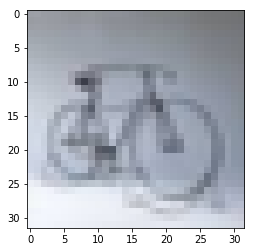

classbicycle
label2


In [16]:
show_test_sample_info(1300)

In [1]:
import keras
from keras.models import Sequential           #層構造のモデルを定義するためのメソッド
from keras.layers import Dense, Activation          #Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

Using TensorFlow backend.


In [2]:
model = Sequential()


model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))


ValueError: The first layer in a Sequential model must get an `input_shape` or `batch_input_shape` argument.

In [3]:
model.compile(loss='categorical_crossentropy',
             optimizer=SDG(0.01),
             metrics=[accuracy])

batch_size=500

n_epoch=30
#一つの訓練データを何回繰り返して学習させるか

NameError: name 'SDG' is not defined

In [4]:
hist=model.fit(X_train,
              Y_train,
              epochs=n_epoch,
              validation_data=(X_test,Y_test),
              verbose=1,
              batch_size=batch_size)

NameError: name 'X_train' is not defined

In [5]:
# 性能指標を確認
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, model.predict(X_test).argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))

ModuleNotFoundError: No module named 'sklearn'

In [6]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    # 精度(Accuracy)の遷移のプロット
    plt.plot(hist.history['acc'],label="loss for training")
    plt.plot(hist.history['val_acc'],label="loss for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

NameError: name 'hist' is not defined

In [7]:
index=0

show_test_sample_info(index)

pred=model.predict(X_test[index].reshape(1,32,32,3)).argmax()
print('predict:{}'.format(pred))

if pred ==y_test[index]:
    print('正解です')
else:
    print('間違いです')

NameError: name 'show_test_sample_info' is not defined

In [8]:
from sklearn.metrics import confusion_matrix as cm

# 混同行列きれいに出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(np.arange(0, 5, 1))                               
    plt.yticks(np.arange(0, 5, 1))  
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    
# 混同行列を出力
result = model.predict(X_test).argmax(axis=1)
plot_cm(y_test, result)

ModuleNotFoundError: No module named 'sklearn'

In [9]:
print(label)

NameError: name 'label' is not defined

In [ ]:
errors=[]

for i in range(len(y_test)):
     pred_1 = model.predict(X_test[i].reshape(1, 32, 32, 3)).argmax()
    if pred_1 != y_test[i]:
        # (index, 正解ラベル, 予測ラベル)をタプル形式で格納
        errors.append((i, label[y_test[i]], label[pred_1]))